In [15]:
import numpy as np
from array import array
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [16]:
dirin='/home/rdavis39/CLIM470/CLIM-470-Numerical-Weather-Prediction/ProgramData/'
zDfil='lowgeopot.dat'
uDfil='lowuwind.dat'
vDfil='lowvwind.dat'
topo_file = "lowtopo.dat"

In [96]:
ntime=3
nx=13
ny=5
recl=(nx*ny)*4
z_bin=np.zeros((ntime,nx,ny))
u_bin=np.zeros((ntime,nx,ny))
v_bin=np.zeros((ntime,nx,ny))
topo_bin=np.zeros((ny,nx))

In [97]:
ds_topo_bin = open(dirin+topo_file,'rb')

tmp = ds_topo_bin.read(recl)
tmp1 = array('f',tmp)
#tmp2=tmp1[1:-1] #for fortran sequential
ds_topo_bin=np.reshape(tmp1,(ny,nx))

In [98]:
ds_z_bin = open(dirin+zDfil,'rb')
for t in range(ntime):
    tmp = ds_z_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    z_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_z_bin,tmp,tmp1

In [99]:
ds_u_bin = open(dirin+uDfil,'rb')
for t in range(ntime):
    tmp = ds_u_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    u_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_u_bin,tmp,tmp1

In [100]:
ds_v_bin = open(dirin+vDfil,'rb')
for t in range(ntime):
    tmp = ds_v_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    v_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_v_bin,tmp,tmp1

In [101]:
# calculate time mean
z_bin_mean = z_bin.mean(axis=0)
u_bin_mean = u_bin.mean(axis=0)
v_bin_mean = v_bin.mean(axis=0)

Text(0.5, 1.0, 'gh snapshot')

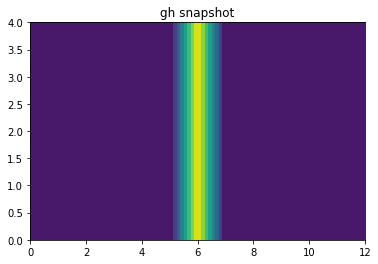

In [102]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contourf(ds_topo_bin)
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'Time avg')

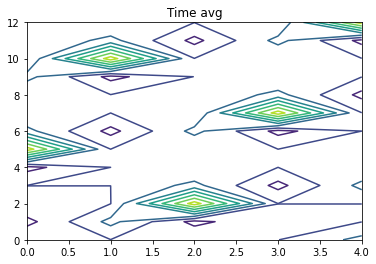

In [103]:
# plot the time average 
fig, ax = plt.subplots()
zc = ax.contour(z_bin_mean)
ax.set_title('Time avg')

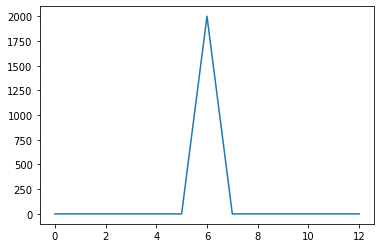

In [104]:
fig, ax = plt.subplots()
zc = ax.plot(ds_topo_bin[0,:])

Text(0.5, 1.0, 'gh snapshot')

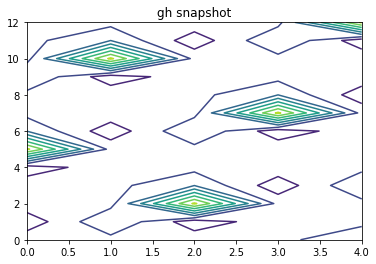

In [105]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contour(z_bin[-1,:,:])
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'gh time mean')

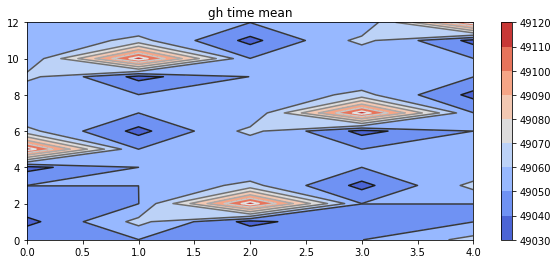

In [106]:
# plot filled contours
fig, ax = plt.subplots(figsize=(10,4))
zc = ax.contourf(z_bin_mean,cmap=cm.coolwarm)
plt.colorbar(zc)

# plot the contour lines using gray lines
zl = ax.contour(z_bin_mean,cmap=cm.gray)
ax.set_title('gh time mean')

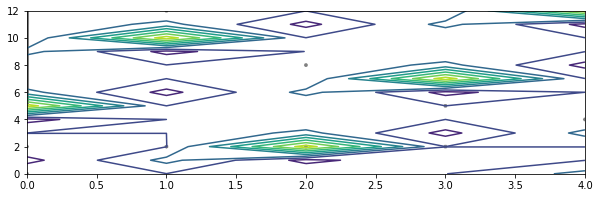

In [107]:
# Plot gh and wind vectors
fig, ax = plt.subplots(figsize=(10,3))
zc = ax.contour(z_bin_mean)
skip=(slice(None, None, 3), slice(None, None, 3))
x=np.arange(nx)
y=np.arange(ny)
zc = ax.quiver(u_bin_mean, v_bin_mean,color='grey')


In [108]:
u_bin_mean[:,:]

array([[ 1.99199982e+01,             nan,             nan,
                    nan,             nan],
       [            nan,             nan,             nan,
                    nan,             nan],
       [-7.55084364e+31,  1.99199982e+01, -7.55085138e+31,
         1.99199982e+01,             nan],
       [            nan,             nan,             nan,
         1.99199982e+01,             nan],
       [            nan,             nan,             nan,
                    nan, -7.54743092e+31],
       [ 1.99199982e+01,             nan,             nan,
         1.99199982e+01,  1.99199982e+01],
       [            nan,             nan,  1.99206581e+01,
                    nan,             nan],
       [            nan,             nan,             nan,
                    nan,             nan],
       [            nan,             nan, -3.77570487e+31,
                    nan,             nan],
       [            nan,             nan,             nan,
                    nan

In [109]:
v_bin_mean[:,:]

array([[ 9.95000159e+00,             nan,             nan,
                    nan,             nan],
       [            nan,             nan,             nan,
                    nan,  9.95000159e+00],
       [ 9.95000159e+00,  9.95000159e+00,  9.95000159e+00,
         1.00000001e-01,             nan],
       [            nan,             nan,             nan,
                    nan,             nan],
       [            nan,             nan,             nan,
         1.51016867e+34,  1.00000001e-01],
       [ 1.51017032e+34,             nan,             nan,
         1.00000001e-01,             nan],
       [            nan,  1.00000001e-01,             nan,
                    nan,             nan],
       [            nan,             nan,             nan,
                    nan,             nan],
       [            nan,  1.00000001e-01, -1.75530347e+30,
                    nan,             nan],
       [            nan,             nan,             nan,
                    nan